# Load CSV 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("water_tank_data.csv", parse_dates=["datetime"])

df.head()


,datetime,tank_level_percent,water_in_liters,water_out_liters,weather_temp,humidity,weekday,is_weekend
0,2025-01-01 00:00:00,76.1,0,39,32,53,2,0
1,2025-01-01 06:00:00,71.6,0,45,28,57,2,0
2,2025-01-01 12:00:00,67.3,0,43,32,59,2,0
3,2025-01-01 18:00:00,63.8,0,35,32,60,2,0
4,2025-01-02 00:00:00,60.6,0,32,30,53,3,0


# Plot Tank Level to See patterns

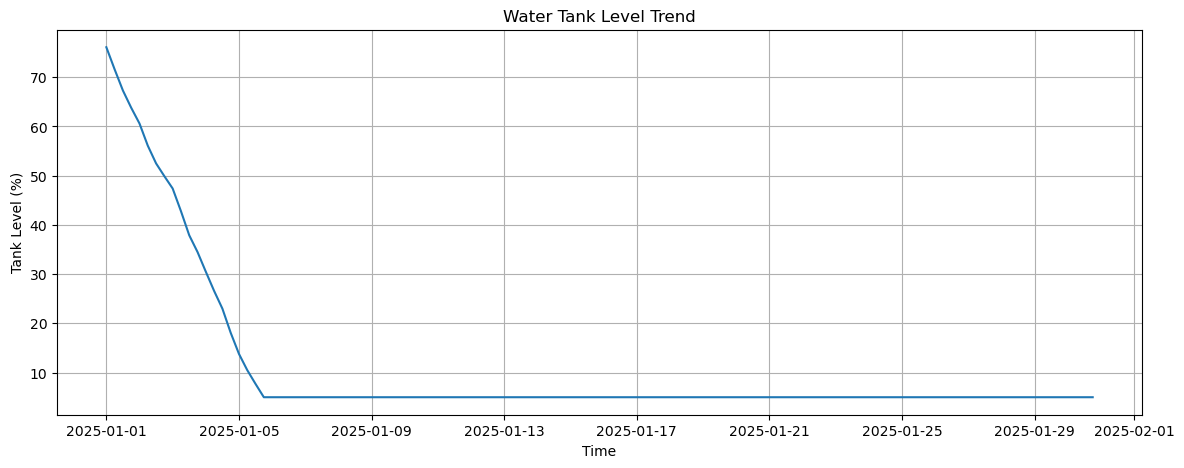

In [3]:
plt.figure(figsize=(14,5))
plt.plot(df["datetime"], df["tank_level_percent"])
plt.title("Water Tank Level Trend")
plt.xlabel("Time")
plt.ylabel("Tank Level (%)")
plt.grid(True)
plt.show()


# Create Features for ML

In [4]:
df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.day
df["dayofweek"] = df["datetime"].dt.dayofweek


# Train Prediction Model

In [6]:
import sys
!{sys.executable} -m pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/b8/90/f082b89dd74da8ca27f8a3c7b3e38fc8529a4a14eb2c5b0937c7d66aa922/xgboost-3.1.1-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/72.0 MB 100.9 kB/s eta 0:11:54
   ---------------------------------------- 0.0/72.0 MB 100.9 kB/s eta 0:11:54
   ---------------------------------------- 0.0/72.0 MB 100.9 kB/s eta 0:11:54
   ---------------------------------------- 0.0/72.0 MB 93.7 kB/s et

In [8]:
from xgboost import XGBRegressor
print("XGBoost Working!")


XGBoost Working!


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

X = df[[
    "hour", "dayofweek", "weather_temp",
    "humidity", "water_in_liters", "water_out_liters"
]]

y = df["tank_level_percent"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

model = XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = (mean_squared_error(y_test, y_pred))**0.5
print("RMSE:", rmse)


# Plot Actual vs. Predicted Tank Levels

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.title("Tank Level Prediction")
plt.legend()
plt.show()


# Predict Next 24 Hours Level

In [ ]:
future = pd.DataFrame({
    "hour": list(range(24)),
    "dayofweek": [df["dayofweek"].iloc[-1]] * 24,
    "weather_temp": [30]*24,
    "humidity": [55]*24,
    "water_in_liters": [0]*24,
    "water_out_liters": [35]*24
})

future_pred = model.predict(future)

print("Next 24 hours tank levels:")
future_pred


# Predict When Tank Will Become Empty

In [ ]:
import numpy as np

empty_time = np.where(future_pred < 20)[0]

if len(empty_time) > 0:
    print("Tank will reach 20% at hour:", empty_time[0])
else:
    print("Tank will not empty in next 24 hours.")
